# **Aprendizaje no supervisado**

## Otros algoritmos de agrupación

### Agrupación espectral

La agrupación espectral (Spectral Clustering) es un método de clustering que utiliza la teoría de grafos y descomposición espectral para agrupar datos de una manera que puede capturar la estructura no lineal de los mismos. A diferencia de los algoritmos tradicionales como K-Means, que dependen de la forma geométrica de los clusters (grupos esféricos, por ejemplo), la agrupación espectral es capaz de descubrir clusters con formas más complejas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import SpectralClustering


In [2]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [3]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [4]:
sc1.affinity_matrix_.round(2)

array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0.3, ..., 0. , 0. , 0. ],
       [0. , 0.3, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [5]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [6]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")

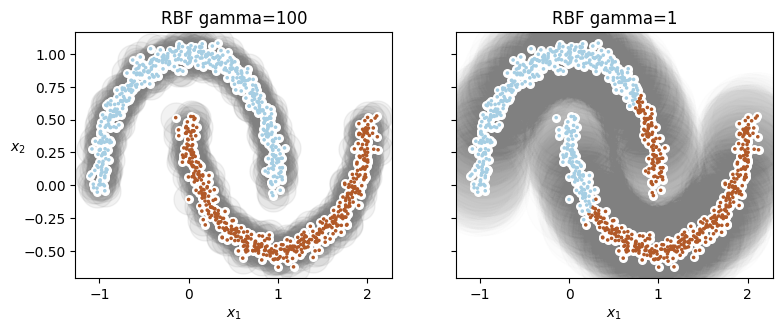

In [7]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Agrupación aglomerativa

Agglomerative Clustering es un algoritmo de clustering jerárquico que agrupa los datos de forma iterativa mediante un enfoque bottom-up (de abajo hacia arriba). A diferencia de algoritmos como K-Means, este no requiere definir un número fijo de clusters al inicio, aunque se puede especificar si es necesario. En lugar de dividir los datos en un número predefinido de grupos, Agglomerative Clustering comienza considerando cada punto como un cluster individual y luego agrupa sucesivamente los puntos o clusters más cercanos hasta formar un único cluster o hasta alcanzar un número específico de clusters.

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [10]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [11]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [12]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Gaussian Mixtures

Los modelos de mezcla gaussiana (Gaussian Mixture Models, GMM) son un tipo de modelo de clustering basado en la distribución estadística y pertenecen a la familia de los algoritmos de soft clustering. Los GMM asumen que los datos están generados a partir de una mezcla de varias distribuciones gaussianas (normales) con parámetros desconocidos. Son especialmente útiles para modelar conjuntos de datos con subpoblaciones que tienen patrones estadísticos normales y son ampliamente utilizados debido a su flexibilidad para modelar distribuciones complejas.

Generemos el mismo conjunto de datos que antes con tres elipsoides (con el que K-Means tuvo problemas):

In [13]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Entrenemos un modelo de mezcla gaussiana con el conjunto de datos anterior:

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Veamos los parámetros estimados por el algoritmo GM:

In [16]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [17]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [18]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

¿Convergió realmente el algoritmo?

In [19]:
gm.converged_

True

Sí, bien. ¿Cuántas iteraciones tomó?

In [20]:
gm.n_iter_

4

Ahora puede utilizar el modelo para predecir a qué cluster pertenece cada instancia (hard clustering) o las probabilidades de que proceda de cada cluster. Para ello, utilice el método `predict()` o el método `predict_proba()`:

In [21]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [22]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

Se trata de un modelo generativo, por lo que puede muestrear nuevas instancias a partir de él (y obtener sus etiquetas):

In [23]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [24]:
y_new

array([0, 0, 1, 1, 1, 2])

Obsérvese que se muestrean secuencialmente de cada conglomerado.

También puede estimar el logaritmo de la _función de densidad de probabilidad_ (PDF) en cualquier lugar utilizando el método `score_samples()`:

In [25]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

Comprobemos que la PDF se integra a 1 en todo el espacio. Tomamos un cuadrado grande alrededor de los conglomerados y lo dividimos en una cuadrícula de cuadrados diminutos; a continuación, calculamos la probabilidad aproximada de que las instancias se generen en cada cuadrado diminuto (multiplicando la PDF en una esquina del cuadrado diminuto por el área del cuadrado) y, por último, sumamos todas estas probabilidades). El resultado es muy próximo a 1:

In [26]:

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225083)

Ahora vamos a trazar los límites de decisión resultantes (líneas discontinuas) y los contornos de densidad:

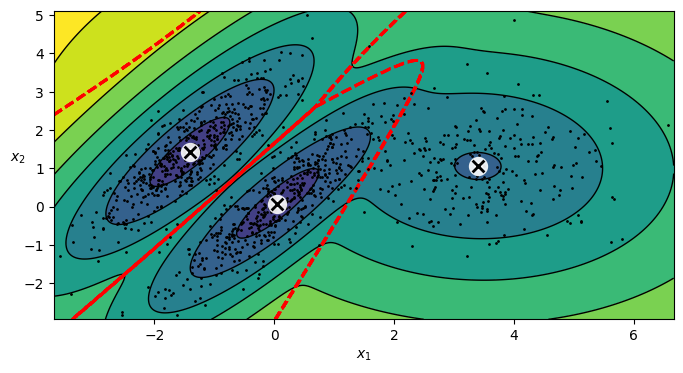

In [27]:

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

Puede imponer restricciones a las matrices de covarianza que busca el algoritmo estableciendo el hiperparámetro `covariance_type`:
* `"spherical"`: todos los conglomerados deben ser esféricos, pero pueden tener diferentes diámetros (es decir, diferentes varianzas).
* `"diag"`: los conglomerados pueden tener cualquier forma elipsoidal de cualquier tamaño, pero los ejes del elipsoide deben ser paralelos a los ejes (es decir, las matrices de covarianza deben ser diagonales).
* `"tied"`: todos los conglomerados deben tener la misma forma, que puede ser cualquier elipsoide (es decir, todos comparten la misma matriz de covarianza).
* `"full"` (por defecto): sin restricción, todos los conglomerados pueden adoptar cualquier forma elipsoidal de cualquier tamaño.

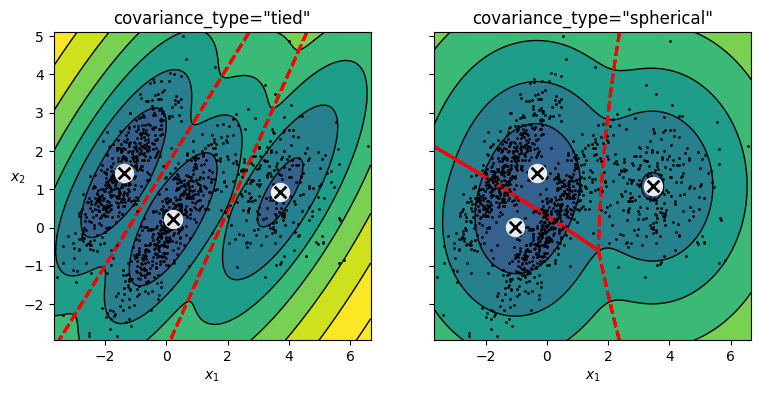

In [28]:

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

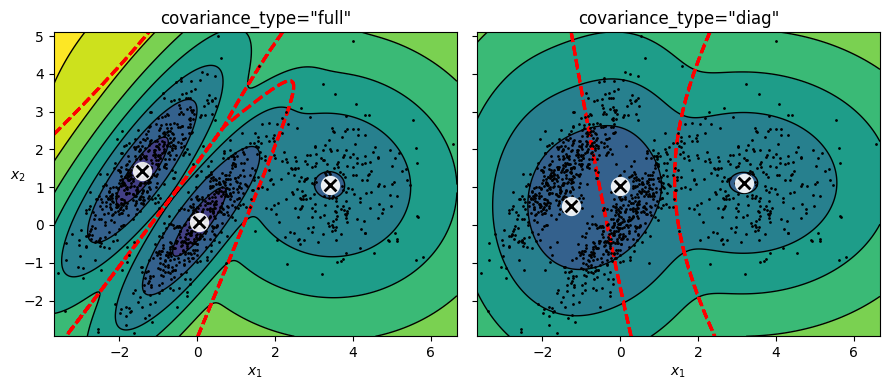

In [29]:
# comparando covarianza_type="full" y covarianza_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Detección de anomalías mediante mezclas gaussianas

Las mezclas gaussianas pueden utilizarse para la _detección de anomalías_: las instancias situadas en regiones de baja densidad pueden considerarse anomalías. Debe definir qué umbral de densidad desea utilizar. Por ejemplo, en una empresa de fabricación que intenta detectar productos defectuosos, la proporción de productos defectuosos suele ser bien conocida. Digamos que es igual al 2%, entonces puede establecer el umbral de densidad para que sea el valor que resulta en tener el 2% de las instancias localizadas en áreas por debajo de ese umbral de densidad:

In [30]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

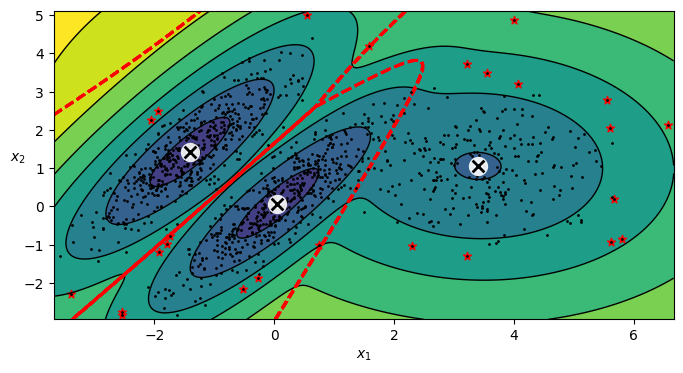

In [31]:

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

## Selección del número de clusters

No podemos utilizar la inercia ni la puntuación de silueta porque ambas suponen que los conglomerados son esféricos. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico como el Criterio de Información Bayesiano (BIC) o el Criterio de Información de Akaike (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$$

* $m$ es el número de instancias.
* $p$ es el número de parámetros aprendidos por el modelo.
* $\hat L$ es el valor maximizado de la función de verosimilitud del modelo. Es la probabilidad condicional de los datos observados $\mathbf{X}$, dado el modelo y sus parámetros optimizados.

Tanto el BIC como el AIC penalizan los modelos que tienen más parámetros que aprender (por ejemplo, más conglomerados), y recompensan los modelos que se ajustan bien a los datos (es decir, los modelos que dan una alta verosimilitud a los datos observados).

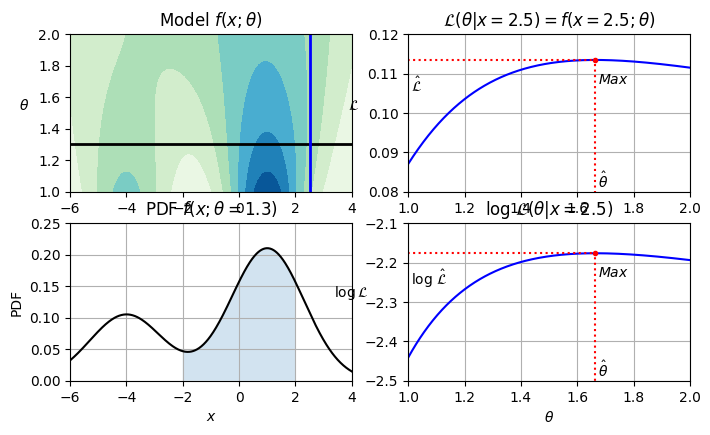

In [32]:

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # índice del primer valor >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

plt.show()

In [33]:
gm.bic(X)

np.float64(8189.733705221636)

In [34]:
gm.aic(X)

np.float64(8102.508425106598)

Podríamos calcular el BIC manualmente así:

In [35]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221636
aic = 8102.508425106598
n_params = 17


Hay un peso por conglomerado, pero la suma debe ser igual a 1, por lo que tenemos un grado de libertad menos, de ahí el -1. Del mismo modo, los grados de libertad para una matriz de covarianza $n \times n$ no es $n^2$, sino $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Entrenemos modelos de mezclas gaussianas con varios valores de $k$ y midamos su BIC:

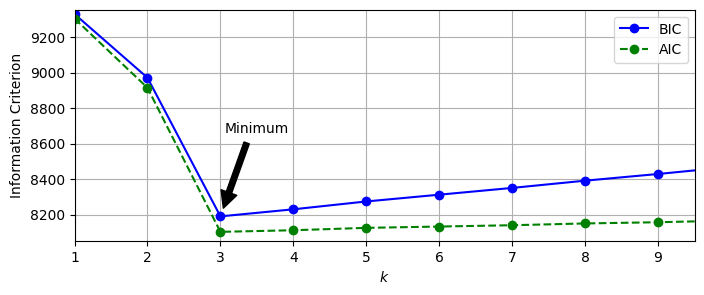

In [36]:

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
plt.show()

## Modelos Bayesian Gaussian Mixture

En lugar de buscar manualmente el número óptimo de conglomerados, es posible utilizar en su lugar la clase `BayesianGaussianMixture` que es capaz de dar pesos iguales (o cercanos) a cero a los conglomerados innecesarios. Basta con establecer el número de componentes en un valor que considere superior al número óptimo de conglomerados, y el algoritmo eliminará automáticamente los conglomerados innecesarios.

In [37]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

c:\Users\javier.sdiaz\Desktop\BootCamp\DS102024\.venv\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

El algoritmo ha detectado automáticamente que sólo se necesitan 3 componentes.

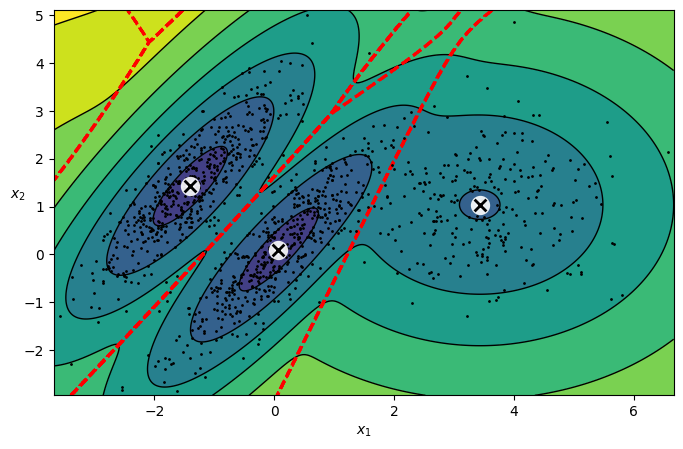

In [38]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

c:\Users\javier.sdiaz\Desktop\BootCamp\DS102024\.venv\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


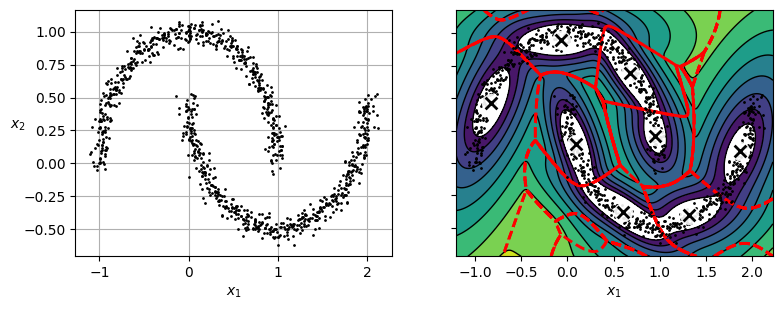

In [39]:

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

Uy, no muy bien... en lugar de detectar 2 conglomerados con forma de luna, el algoritmo detectó 8 conglomerados elipsoidales. Sin embargo, el gráfico de densidad no tiene tan mal aspecto, así que podría servir para detectar anomalías.